In [13]:
import tweepy, pandas as pd, matplotlib.pyplot as plt, nltk, re, numpy as np, seaborn as sb
from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud 
pd.options.display.max_colwidth = 300
plt.rcParams['figure.figsize'] = (14, 7)
# polaridad >0.2 positivo, [-0.2:0.2] es neutro, <-0.2 negativo

In [15]:
datos = pd.read_csv("tweets.csv",encoding='utf-8-sig')
print('El tamaño inicial del dataframe',datos.shape)

El tamaño inicial del dataframe (476, 11)


In [16]:
!pip install geos
!sudo apt-get install libgeos-3.X.X
!sudo apt-get install libgeos-dev
!pip install --user https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.X.X
E: Couldn't find any package by glob 'libgeos-3.X.X'
E: Couldn't find any package by regex 'libgeos-3.X.X'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759541 sha256=0e5262c1ecbad0b421a275fc4ed5930e08d2951dbebc2a0ae34925501bae9198
  Stored in directory: /tmp/pip-ephem-wheel-cache-4mv5x203/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [18]:
duser = datos.groupby('username')['name'].nunique().sort_values(ascending=False)
duser.head(30)

username
zarinlm            1
Mavi22632341       1
LuisEspania        1
LuzAlba96191316    1
MARIOSBV           1
MaEmiliaKelly      1
Majimepa           1
Mara89107823       1
MarcoA_Sanchez     1
MariajoMontene1    1
MariajuliahMara    1
MiguelRecuero      1
LudeFati           1
MiqelGaez          1
Mithos2018         1
MoncadaJoan2       1
MorenoDiaz_        1
NetoResendiz16     1
OTRI_UCLM          1
OctavioTelloBla    1
Odreyesm           1
PacioJanse         1
Luis10Enriquez     1
Lovegrace_88       1
Paforos            1
JulianCarb         1
JkZ26              1
JoanStQ            1
JonaBot18          1
JordideManresa     1
Name: name, dtype: int64

In [20]:
word_counts = datos['tweet'].apply(lambda x: len(x.split()))
word_counts.describe()

count    476.000000
mean      27.594538
std       10.200593
min        5.000000
25%       21.000000
50%       23.000000
75%       35.000000
max       55.000000
Name: tweet, dtype: float64

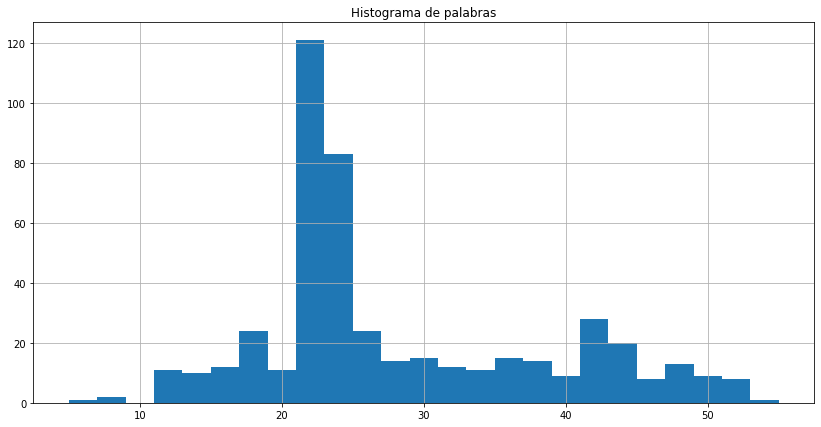

In [23]:
plt.hist(word_counts.values, bins=25)
plt.title('Histograma de palabras')
plt.grid(True)

In [24]:
nltk.download('punkt') # At first you have to download these nltk packages.
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [29]:
stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

In [30]:
def data_preprocessing(review):
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub(r"&amp;|â€¦", ' ', review)
  review =  re.sub(r"http\S+", ' ', review)
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  review = review.lower()
  tokens = nltk.word_tokenize(review)
  review = [word for word in tokens if word not in stop_words]
  # lemmatization
  # review = [lemmatizer.lemmatize(word) for word in review]
  review = ' '.join(review)
  return review

In [31]:
datos['preprocessed_tweet'] = datos['tweet'].apply(lambda tweet: data_preprocessing(tweet))
print('Creando una columna con los tweets', datos.shape)

Creando una columna con los tweets (476, 12)


In [33]:
datos['sentiment'] = datos['preprocessed_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment[0])
print('Calculando el analisis de sentimiento con la nueva columna de tweets')
datos.tail(10)

Calculando el analisis de sentimiento con la nueva columna de tweets


Unnamed: 0  ... sentiment
466         466  ...       0.0
467         467  ...       0.0
468         468  ...       0.0
469         469  ...       0.0
470         470  ...       0.0
471         471  ...       0.0
472         472  ...       0.0
473         473  ...       0.0
474         474  ...       0.0
475         475  ...       0.0

[10 rows x 13 columns]